In [54]:
import random
import math
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.ticker as ticker

In [55]:
SAMPLES = 10 ** 7

In [56]:
buyer_mean = -5
buyer_values = np.random.normal(loc=buyer_mean, size=SAMPLES)
seller_values = np.random.normal(size=SAMPLES)

In [57]:
prices = np.arange(-3.5, -1.5, 0.05)

In [58]:
value_difference = buyer_values - seller_values
optimal_gain_from_trade = np.where(value_difference < 0, 0, value_difference)
probability_of_trade_happening = np.sum(optimal_gain_from_trade > 0) / len(optimal_gain_from_trade)
probability_of_trade_happening

0.0002024

In [59]:
expected_optimal_gain_from_trade = np.average(optimal_gain_from_trade)
expected_optimal_gain_from_trade

7.152669526192432e-05

In [60]:
gain_from_mechs = {}

for p in prices:
    buyer_more_than_p = buyer_values >= p 
    seller_less_than_p = seller_values <= p
    accepted_by_mech = np.logical_and(buyer_more_than_p, seller_less_than_p)
    gain_from_mechs[p] = buyer_values[accepted_by_mech] - seller_values[accepted_by_mech] 
    gain_from_mechs[p] = np.pad(gain_from_mechs[p], (0, SAMPLES - np.sum(accepted_by_mech)), mode="constant", constant_values=0)

visualise_results = []

for price, v in gain_from_mechs.items():
    average_gain_from_trade = np.average(v)
    ratio_of_expected_gain = expected_optimal_gain_from_trade / average_gain_from_trade
    visualise_results.append((price, ratio_of_expected_gain))
    print("Price:", price, "Average gain:", average_gain_from_trade, "Approximation to optimal", ratio_of_expected_gain)

Price: -3.5 Average gain: 1.0393061582204605e-05 Approximation to optimal 6.882158322278687
Price: -3.45 Average gain: 1.1647568421459904e-05 Approximation to optimal 6.140912220798028
Price: -3.4000000000000004 Average gain: 1.2510548255731208e-05 Approximation to optimal 5.717311008265143
Price: -3.3500000000000005 Average gain: 1.3193136653170066e-05 Approximation to optimal 5.421507950858508
Price: -3.3000000000000007 Average gain: 1.3899777667352305e-05 Approximation to optimal 5.145887723796165
Price: -3.250000000000001 Average gain: 1.4434462101348763e-05 Approximation to optimal 4.95527264956003
Price: -3.200000000000001 Average gain: 1.6185061969264086e-05 Approximation to optimal 4.419303144946596
Price: -3.1500000000000012 Average gain: 1.7410957262897497e-05 Approximation to optimal 4.1081426013460325
Price: -3.1000000000000014 Average gain: 1.8295850051008594e-05 Approximation to optimal 3.9094491407892398
Price: -3.0500000000000016 Average gain: 1.8983282694437935e-05 App

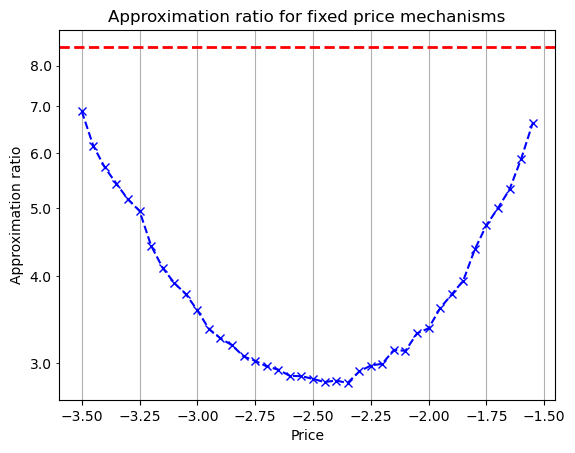

In [63]:
x, y = zip(*visualise_results)
plt.plot(x, y,  marker='x', linestyle='--', color='b')

plt.xlabel('Price')
plt.ylabel('Approximation ratio')
plt.title('Approximation ratio for fixed price mechanisms')

plt.yscale('log')
plt.gca().yaxis.set_major_formatter(ticker.ScalarFormatter())
plt.gca().yaxis.set_minor_formatter(ticker.ScalarFormatter())
plt.gca().ticklabel_format(style='plain', axis='y')

asymptotically_optimal = 4 * math.log(2 / probability_of_trade_happening) 
plt.axhline(y=asymptotically_optimal, color='red', linestyle='--', linewidth=2, label='Asymptotically optimal')

plt.grid(True)
plt.show()